In [0]:
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
from torch import nn
from torchvision import transforms

#hyperparameters
n_epochs=40
learning_rate=0.0001
batch_size=4

training_set=datasets.FashionMNIST('data',train=True,download=True,transform=transforms.ToTensor())
testing_set=datasets.FashionMNIST('data',train=False,download=True,transform=transforms.ToTensor())
train_data=DataLoader(training_set,shuffle=True,batch_size=batch_size)
test_data=DataLoader(testing_set,shuffle=False,batch_size=batch_size)

In [0]:
#network
network=nn.Linear(28*28,10)
optimizer=torch.optim.Adam(network.parameters(),lr=learning_rate)
cal_loss=nn.CrossEntropyLoss()

In [3]:
track_loss=[]
#training
for epoch in range(n_epochs):
  print ("epoch........."+str(epoch))
  running_loss=0
  minibatch=0
  for img,lbl in train_data:
    optimizer.zero_grad()
    N,_,h,w = img.size()
    score=network(img.view(N,h*w))
    loss=cal_loss(score,lbl)
    loss.backward()
    optimizer.step()
    running_loss += loss.detach().numpy()
    minibatch +=1
  avg_loss=running_loss/minibatch
  track_loss.append(avg_loss)
  print("average loss....." + str(avg_loss))


epoch.........0
average loss0.7160007396791751
epoch.........1
average loss0.5162016524763157
epoch.........2
average loss0.4775174841144782
epoch.........3
average loss0.4570692719876456
epoch.........4
average loss0.4441302778193921
epoch.........5
average loss0.43459481425175134
epoch.........6
average loss0.4267558589068164
epoch.........7
average loss0.4212998675162167
epoch.........8
average loss0.41650950930113906
epoch.........9
average loss0.41264493098062427
epoch.........10
average loss0.40924171679431265
epoch.........11
average loss0.4061220593129023
epoch.........12
average loss0.40360614293389374
epoch.........13
average loss0.4011968756393753
epoch.........14
average loss0.3989889278116282
epoch.........15
average loss0.39692270507948996
epoch.........16
average loss0.39541373685550596
epoch.........17
average loss0.3936279603009442
epoch.........18
average loss0.3923356304315074
epoch.........19
average loss0.3912249118655969
epoch.........20
average loss0.389557396021

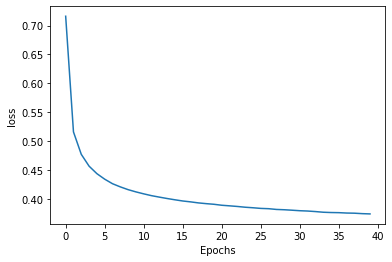

<Figure size 432x288 with 0 Axes>

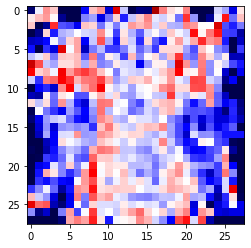

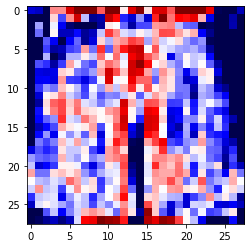

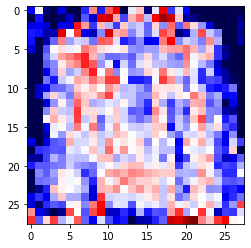

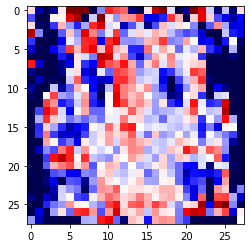

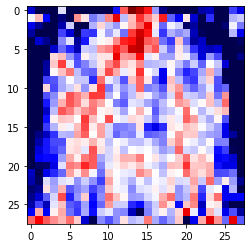

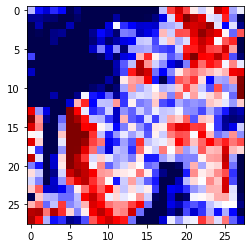

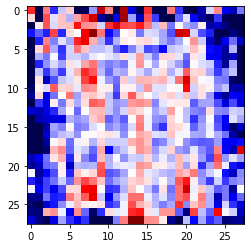

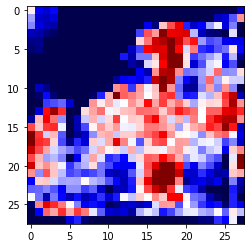

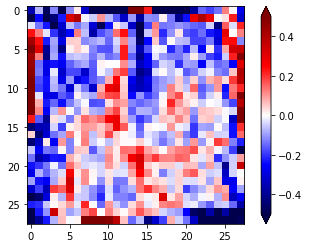

In [4]:
plt.plot([i for i in range(n_epochs) ],track_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()
weights = network.state_dict()['weight']
plt.clf()
    
for i in range(9):
  plt.figure()
  plt.imshow(weights[i].view(28,28),vmin=-0.5,vmax=0.5,cmap='seismic')
  
plt.colorbar(extend='both')